----

# Descripción del proyecto
Se te ha ido muy bien en el curso TripleTen y te han ofrecido hacer prácticas en el departamento analítico de Y.Afisha. Tu primera tarea es ayudar a optimizar los gastos de marketing.

Lo que tienes:

- registros del servidor con datos sobre las visitas a Y.Afisha desde enero de 2017 hasta diciembre de 2018;
- un archivo con los pedidos en este periodo;
- estadísticas de gastos de marketing.

Lo que vas a investigar:

- cómo los clientes usan el servicio;
- cuándo empiezan a comprar;
- cuánto dinero aporta cada cliente a la compañía;
- cuándo los ingresos cubren el costo de adquisición de los clientes.

# Paso 1. Descarga los datos y prepáralos para el análisis
Almacena los datos de visitas, pedidos y gastos en variables. Optimiza los datos para el análisis. Asegúrate de que cada columna contenga el tipo de datos correcto.

## Preparación de los datos

### Importe de librerías, creación de DataFrames y revisión preliminar de la información:

In [1]:
#Importe de librerías a usar en el desarrollo del proyecto:

import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

In [2]:
#Lectura de datasets como fuente de datos y creación de DataFrames a desarrollar:

df_visits = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/visits_log_us.csv')

df_orders = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/orders_log_us.csv')

df_costs = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/costs_us.csv')

In [3]:
#Revisión general de la información:

#Revisión del primer dataset:

df_visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 79.3 MB


In [4]:
display(df_visits.sample(20))

,Device,End Ts,Source Id,Start Ts,Uid
209050,touch,2017-11-28 02:06:00,3,2017-11-28 02:04:00,7346863101952994322
350039,touch,2018-04-27 07:13:00,5,2018-04-27 07:06:00,2669331828162548942
324231,desktop,2018-02-04 10:43:00,4,2018-02-04 10:41:00,12367261703839734470
8284,touch,2017-10-25 18:50:00,5,2017-10-25 18:44:00,7699288435103518787
145265,desktop,2017-11-28 12:47:00,10,2017-11-28 12:47:00,11158721623069577537
128658,desktop,2018-01-19 14:11:00,3,2018-01-19 14:09:00,3558010846495234547
13135,touch,2018-04-09 18:40:00,2,2018-04-09 18:33:00,14809808202522261740
320114,desktop,2017-06-27 13:21:00,3,2017-06-27 13:21:00,16347864416657617443
54312,touch,2018-02-14 16:46:00,10,2018-02-14 16:45:00,13139697077436272207
224791,desktop,2017-07-14 00:55:00,3,2017-07-14 00:34:00,5632097414590889502


Podemos destacar de manera inicial que el Dataframe df_visits no contiene datos nulos en ninguna columna de sus 359400 registros. Además, contiene una columna (Device) que puede ser reemplazada por tipo Category (con menor requerimiento en procesamiento de información que los datos tipo Object), y otras 2 columnas (End Ts y Start Ts) con formato fecha, que pueden ser sustituidas con datos tipo datetime.

In [5]:
#Revisión del segundo dataset:

df_orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 4.4 MB


In [6]:
display(df_orders.sample(20))

,Buy Ts,Revenue,Uid
26200,2017-12-26 15:41:00,55.00,5539673724080479777
31701,2018-01-29 19:14:00,3.42,14578592139423304251
42019,2018-03-26 12:50:00,0.33,17802982387255789292
2089,2017-06-27 15:03:00,1.83,5059265819729158179
1889,2017-06-24 01:16:00,4.28,14172972538061335045
34864,2018-02-14 19:02:00,2.33,1040468029110517890
30614,2018-01-23 10:56:00,8.25,17725416326856436238
45559,2018-04-26 10:46:00,13.44,6166747268563050393
30420,2018-01-22 10:14:00,1.10,10134471495895745964
28827,2018-01-10 16:16:00,1.22,8592000162211069853


De manera similar, el Dataframe df_orders no contiene datos nulos en ninguna columna de sus 50415 registros. Además, contiene una columna (Buy Ts) que puede ser reemplazada por tipo datetime.

In [7]:
#Revisión del tercer dataset:

df_costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 206.2 KB


In [8]:
display(df_costs.sample(20))

,source_id,dt,costs
172,1,2017-11-20,77.10
279,1,2018-03-07,55.27
2223,10,2017-07-15,20.96
67,1,2017-08-07,27.78
2470,10,2018-03-19,20.30
163,1,2017-11-11,77.93
421,2,2017-07-29,23.74
907,3,2017-11-29,654.18
1305,4,2018-01-03,102.03
1942,9,2017-10-05,21.15


Finalmente el Dataframe df_costs no contiene datos nulos en ninguna columna de sus 2542 registros. Además, contiene una columna (dt) que puede ser reemplazada por tipo datetime.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto, bien con esta revisión inicial

</div>

### Optimización de la información

En este apartado, buscaremos optimizar la velocidad de procesamiento de los datasets con el fin de utilizar la menor cantidad de recursos de nuestra PC. Como pudimos ver en la revisión preliminar de los datos, en todos los Dataframes podemos sustituir al menos una columna al tipo datetime, y en el primer dataset al tipo Category en la columna Device.

Ayudándonos de los parámetros dtype y parse_dates del método pd.read_csv() descargaremos datos en los formatos necesarios desde el principio. Es decir, reasignaremos los Dataframes en una sola línea de comando.

In [9]:
#Reasignación de datasets con dtype y parse_dates del método pd.read_csv()

df_visits = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/visits_log_us.csv', dtype = {'Device': 'category'}, parse_dates=['End Ts', 'Start Ts']) #---> Descarga del primer Df con los tipos de datos corregidos.

df_orders = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/orders_log_us.csv', parse_dates=['Buy Ts']) #---> Descarga del segundo Df con los tipos de datos corregidos.

df_costs = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/costs_us.csv', parse_dates=['dt']) #---> Descarga del tercer Df con los tipos de datos corregidos.


Ahora veamos en cuanto se reduce el tamaño de procesamiento en cada dataset:

In [10]:
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [11]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [12]:
df_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


Todas las lecturas redujeron considerablemente su tamaño de la memoria usada para obtener la información.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Muy bien

</div>

### Consideraciones adicionales

1. Los nombres de las columnas serán transformados a un formato snake_case y pasado a minúsculas.
2. Se revisarán los casos de los datos duplicados en cada dataset.

#### 1. Estandarización de columnas 

In [13]:
#Se corregirán los nombres de las columnas a través de una función llamada standarized_columns. Así se corregirán los datos independiente del número de columnas almacenadas en el DataFrame:


def standarized_columns(columns):  # Función para reemplazar columnas de cualquier DataFrame con el formato deseado

    revised_col_names = []  #---> Lista para almacenar los nombres de columnas corregidos

    for old_name in columns:
        name_stripped = old_name.strip() #Eliminación de espacios en nombres de columnas
        name_lowered = name_stripped.lower() #Transformación de columnas a minúsculas
        snake_case_format = name_lowered.replace(' ', '_') #Reemplazo de espacios con un guión bajo '_'
        revised_col_names.append(snake_case_format)     
    return revised_col_names    


In [14]:
# Estandarización del formato a través del uso de la función standarized_columns:

df_visits.columns = standarized_columns(df_visits) # Estandarización primer DataFrame

df_orders.columns = standarized_columns(df_orders) # Estandarización segundo DataFrame

df_costs.columns = standarized_columns(df_costs) # Estandarización tercer DataFrame

In [15]:
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [16]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [17]:
df_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


Todos los dataframes contienen el formato snake_case en cada una de sus columnas.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Muy bien con snakecase, es un buen formato

</div>

#### 2. Revisión de datos duplicados

Cabe resaltar que como los datasets son de tipo transaccional, en este apartado sólo se revisarán aquellas líneas completas de registros que sean duplicadas, ya que las columnas individualmente pueden tener registros duplicados.

In [18]:
#Revisión datos duplicados primer dataframe:

df_visits_duplicated = df_visits.duplicated().sum()

df_visits_duplicated

0

In [19]:
#Revisión datos duplicados segundo dataframe:

df_orders_duplicated = df_orders.duplicated().sum()

df_orders_duplicated

0

In [20]:
#Revisión datos duplicados tercer dataframe:

df_costs_duplicated = df_costs.duplicated().sum()

df_costs_duplicated

0

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Ok, bien
</div>

# Paso 2. Haz informes y calcula métricas 

## Visitas


### - ¿Cuántas personas lo usan cada día, semana y mes?

In [21]:
#En este caso revisaremos el Dataframe df_visits:


#Por día:

df_visits['users_per_day'] = df_visits['start_ts'].dt.to_period('D') # ---> Creación de nueva columna que registra el tráfico de visitas de usuarios por día

users_per_day = df_visits.groupby('users_per_day').agg({'uid':'nunique'})# ---> Cálculo del número de usuarios activos diarios (únicos)

dau_total = users_per_day.mean()
 
print('Dau (usuarios activos diarios):', dau_total.iloc[0])

Dau (usuarios activos diarios): 907.9917582417582


Número de visitas mínimas diarias: 1
Número de visitas máximas diarias: 3319


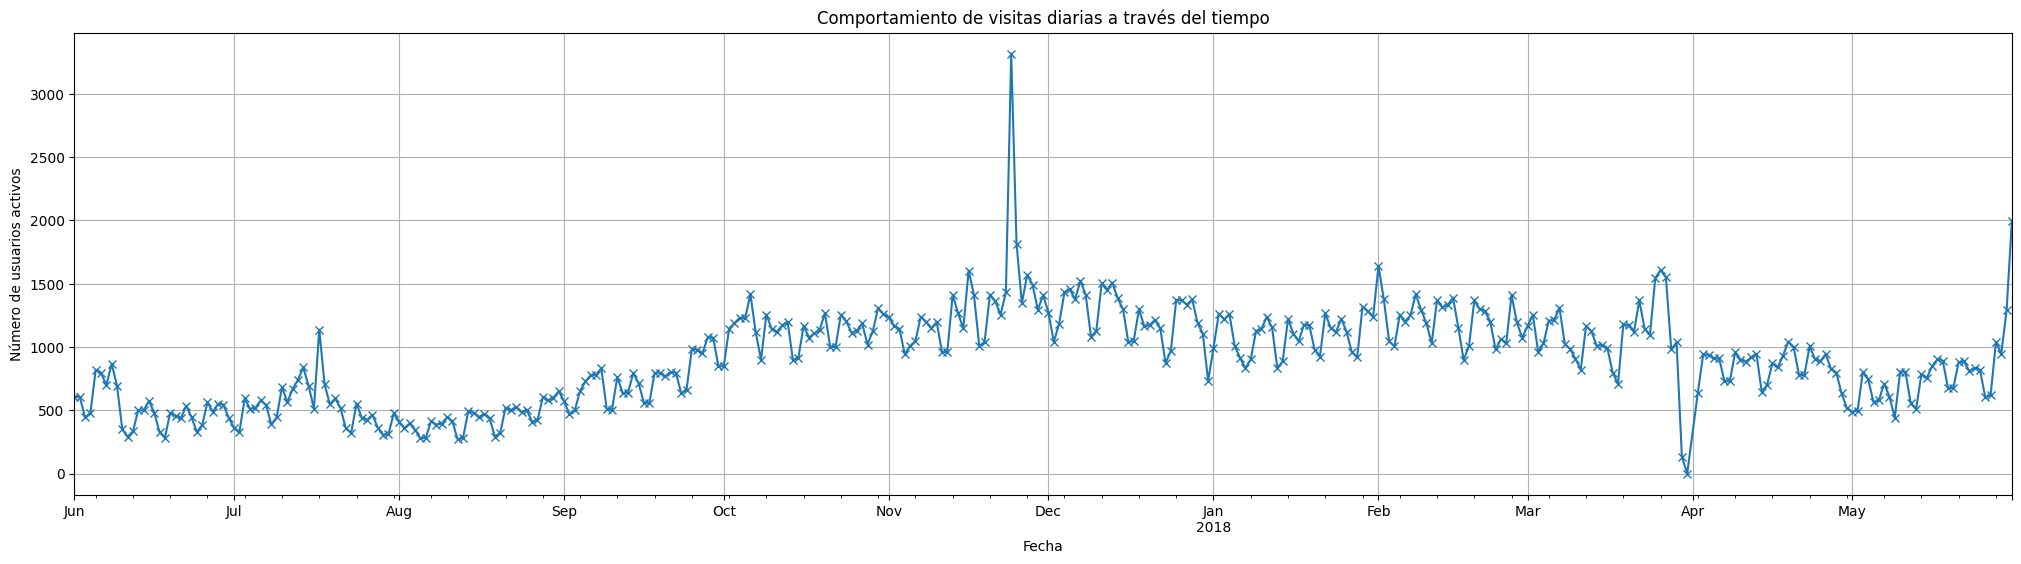

In [22]:
#Comportamiento visual a través del tiempo de las visitas diarias:

print('Número de visitas mínimas diarias:', users_per_day.min().iloc[0])
print('Número de visitas máximas diarias:', users_per_day.max().iloc[0])

users_per_day.plot(kind='line',
                   marker='x',
                   title= 'Comportamiento de visitas diarias a través del tiempo',
                   xlabel= 'Fecha',
                   ylabel= 'Número de usuarios activos',
                   legend=False,
                   figsize = [25,6],
                   grid=True
                   )
plt.show()

In [23]:
#Por semana:

df_visits['users_per_week'] = df_visits['start_ts'].dt.to_period('W') # ---> Creación de nueva columna que registra el tráfico de visitas de usuarios por semana

users_per_week = df_visits.groupby('users_per_week').agg({'uid':'nunique'}) # ---> Cálculo del número de usuarios activos semanales (únicos)

wau_total = users_per_week.mean()
 
print('Wau (usuarios activos semanales):', wau_total.iloc[0])

Wau (usuarios activos semanales): 5716.245283018868


Número de visitas mínimas semanales: 2021
Número de visitas máximas semanales: 10586


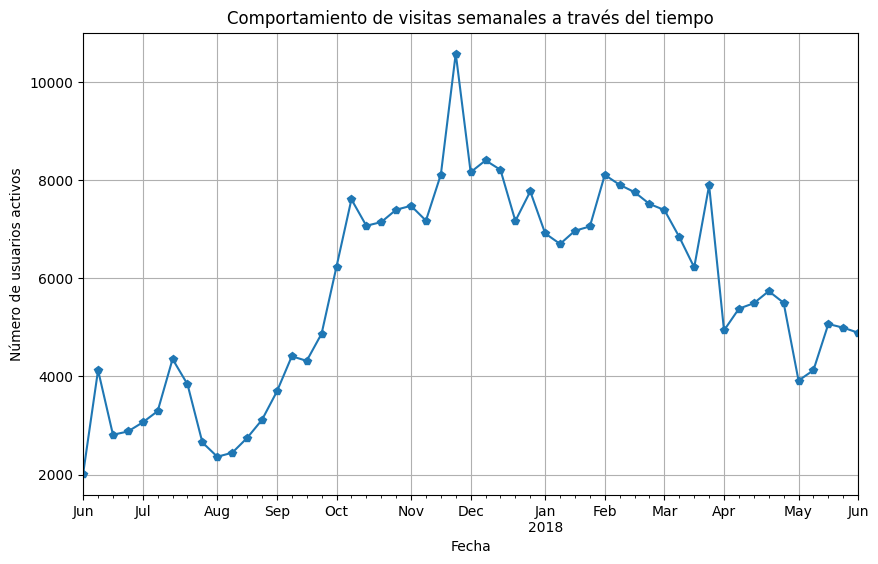

In [24]:
#Comportamiento visual a través del tiempo de las visitas semanales:

print('Número de visitas mínimas semanales:', users_per_week.min().iloc[0])
print('Número de visitas máximas semanales:', users_per_week.max().iloc[0])

users_per_week.plot(kind='line',
                   marker='p',
                   title= 'Comportamiento de visitas semanales a través del tiempo',
                   xlabel= 'Fecha',
                   ylabel= 'Número de usuarios activos',
                   legend=False,
                   figsize = [10,6],
                   grid=True
                   )
plt.show()

In [25]:
#Por mes:

df_visits['users_per_month'] = df_visits['start_ts'].dt.to_period('M') # ---> Creación de nueva columna que registra el tráfico de visitas de usuarios por mes

users_per_month = df_visits.groupby('users_per_month').agg({'uid':'nunique'}) # ---> Cálculo del número de usuarios activos semanales (únicos)

mau_total = users_per_month.mean()
 
print('Mau (usuarios activos mensuales):', mau_total.iloc[0])

Mau (usuarios activos mensuales): 23228.416666666668


Número de visitas mínimas mensuales: 11631
Número de visitas máximas mensuales: 32797


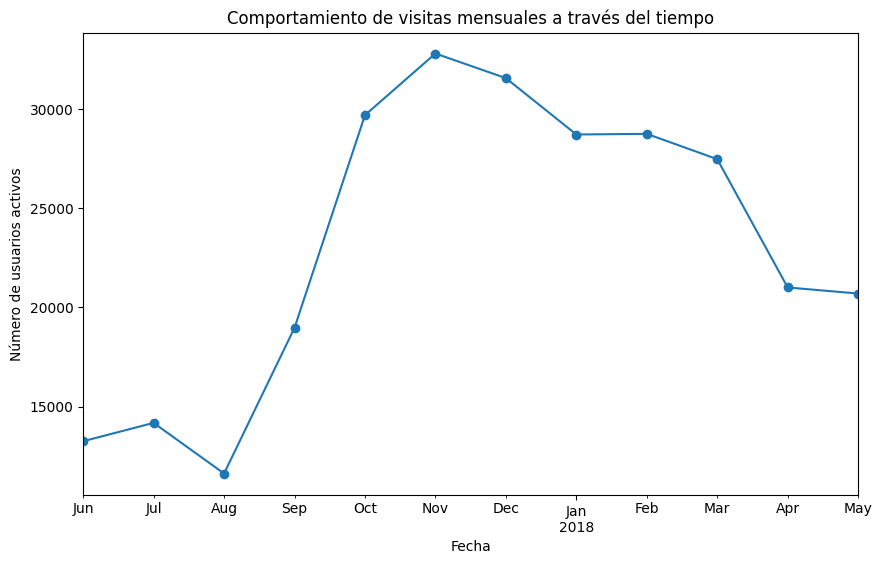

In [26]:
#Comportamiento visual a través del tiempo de las visitas mensuales:

print('Número de visitas mínimas mensuales:', users_per_month.min().iloc[0])
print('Número de visitas máximas mensuales:', users_per_month.max().iloc[0])

users_per_month.plot(kind='line',
                   marker='o',
                   title= 'Comportamiento de visitas mensuales a través del tiempo',
                   xlabel= 'Fecha',
                   ylabel= 'Número de usuarios activos',
                   legend=False,
                   figsize = [10,6]
                   )
plt.show()

Las visitas de los usuarios se incrementa durante los últimos 3 meses del año 2017, alcanzando su pico de mayor actividad en Noviembre de 2017.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Excelente con estos gráficos, todo muy claro!
</div>

### - ¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión)

In [27]:
#En este caso crearemos un nuevo dataframe llamado sessions_per_day que nos permita agrupar por usuarios por día tomando como agregación el conteo de usuarios y el número de usuarios únicos:

sessions_per_day = df_visits.groupby('users_per_day').agg({'uid':['count', 'nunique']})

sessions_per_day.columns = ['n_sessions', 'n_users']

sessions_per_day['sessions_per_users'] = sessions_per_day['n_sessions'] / sessions_per_day['n_users']

print(sessions_per_day.describe(include='all'))

        n_sessions      n_users  sessions_per_users
count   364.000000   364.000000          364.000000
mean    987.362637   907.991758            1.082170
std     418.994796   370.513838            0.020876
min       1.000000     1.000000            1.000000
25%     635.500000   594.000000            1.070321
50%    1003.000000   921.000000            1.082488
75%    1280.000000  1173.000000            1.093876
max    4042.000000  3319.000000            1.217837


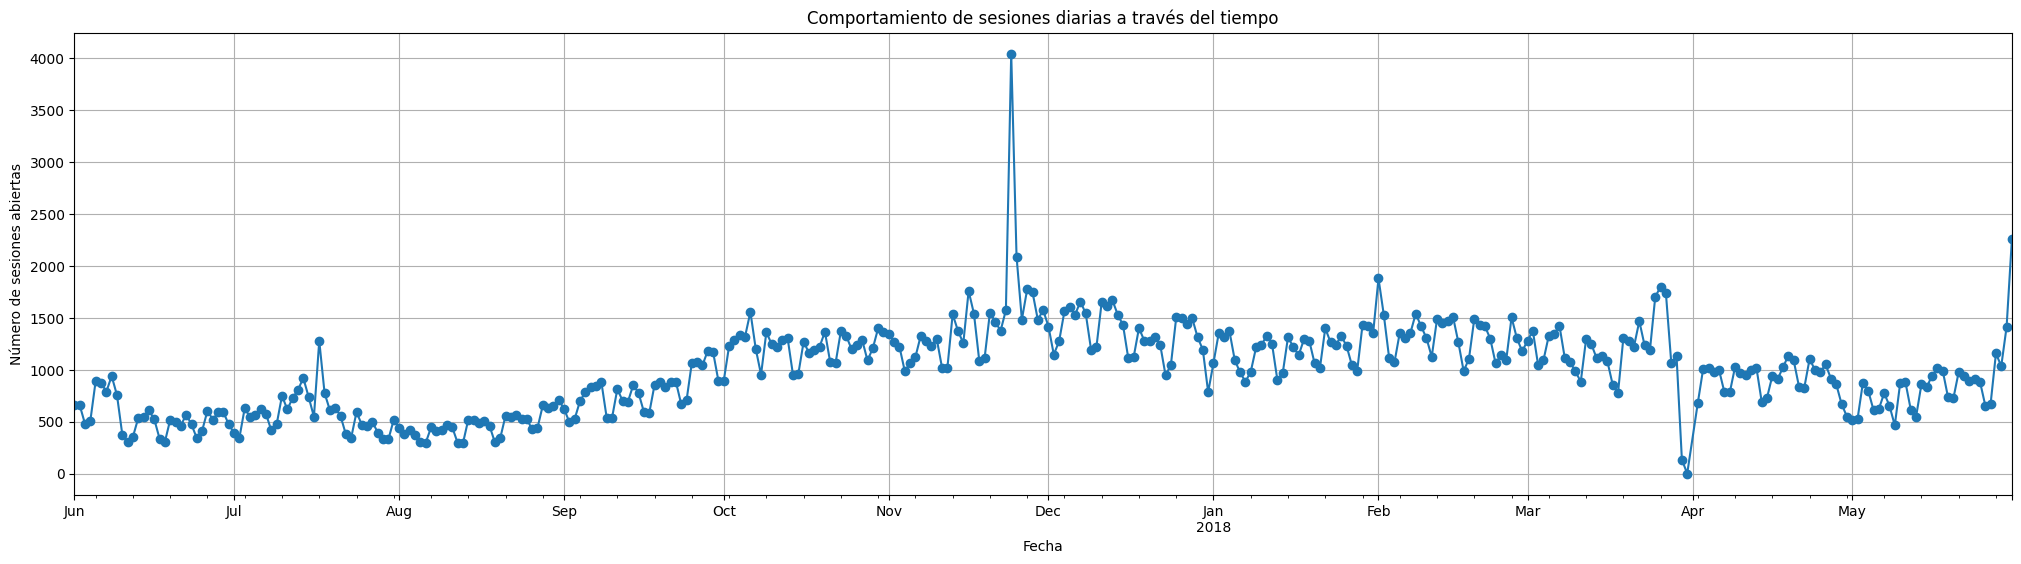

In [28]:
sessions_per_day['n_sessions'].plot(kind='line',
                   marker='o',
                   title= 'Comportamiento de sesiones diarias a través del tiempo',
                   xlabel= 'Fecha',
                   ylabel= 'Número de sesiones abiertas',
                   legend=False,
                   figsize = [25,6],
                   grid=True
                   )
plt.show()

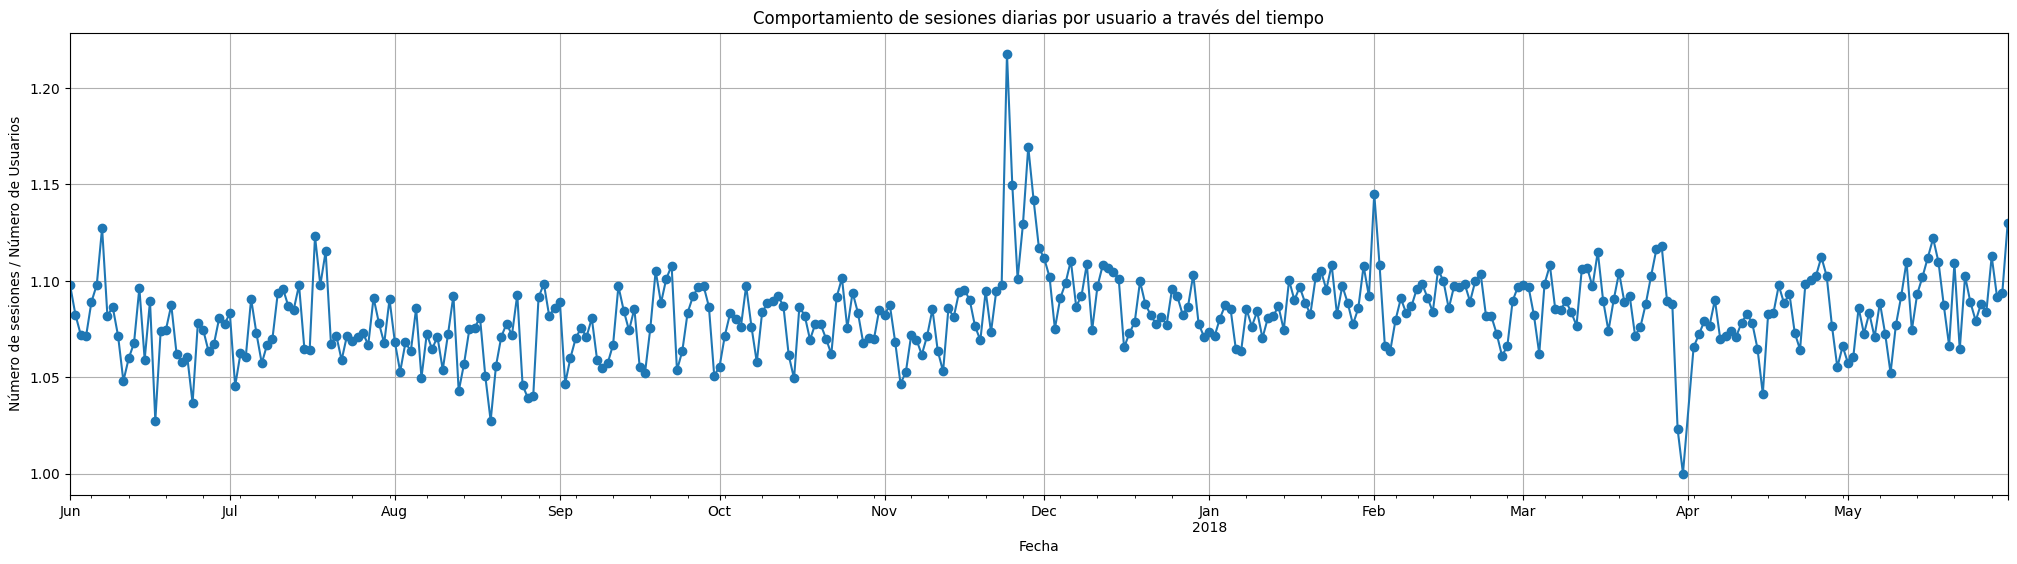

In [29]:
sessions_per_day['sessions_per_users'].plot(kind='line',
                   marker='o',
                   title= 'Comportamiento de sesiones diarias por usuario a través del tiempo',
                   xlabel= 'Fecha',
                   ylabel= 'Número de sesiones / Número de Usuarios',
                   legend=False,
                   figsize = [25,6],
                   grid=True
                   )
plt.show()

El comportamiento de sesiones por día muestra que en promedio hay 987 sesiones por día, con un pico máximo de 4042 sesiones abiertas en noviembre de 2017.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Muy bien!
</div>

### - ¿Cuál es la duración de cada sesión?

La duración media de la sesión, o ASL (Average session length), es la cantidad de tiempo que los usuarios y las usuarias pasan con un producto en la sesión promedio.


In [30]:
#En este caso crearemos una nueva columna llamada session_duration_sec que almacenará la duración de las sesiones en segundos en el dataframe df_visits:

df_visits['session_duration_sec'] = (df_visits['end_ts'] - df_visits['start_ts']).dt.seconds # ---> Creación de columna que almacena la duración de las sesiones por segundo

print('Duración promedio (en segundos) de las sesiones: ', df_visits['session_duration_sec'].mean())

Duración promedio (en segundos) de las sesiones:  643.506488592098


count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration_sec, dtype: float64


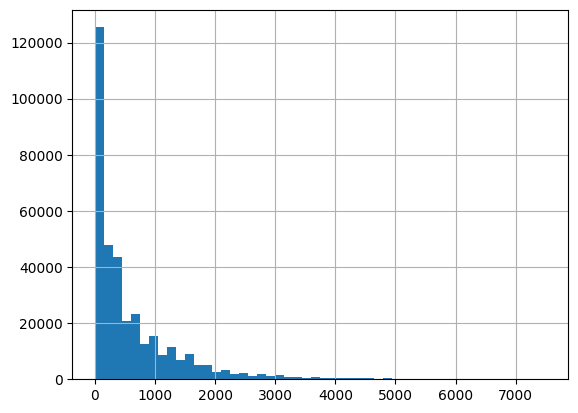

In [31]:
#Visualización del comportamiento de las duraciones de las sesiones:

print(df_visits['session_duration_sec'].describe())
df_visits['session_duration_sec'].hist(bins=50, range=(0,7500)) # Se incluye dentro de un rango de datos de 0 a 7500 ya que la mayoría de los datos están contenidos en dicho rango

plt.show()

In [32]:
# En este caso se ve que la distribución difiere de ser normal, por lo que se tendrá en cuenta la moda de dicho grupo de datos:

print('Duración (en segundos) más usual de las sesiones: ', df_visits['session_duration_sec'].mode().iloc[0])

Duración (en segundos) más usual de las sesiones:  60


El tiempo de duración de sesiones que más se frecuenta en el grupo de datos es de 60 segundos. Teniendo en cuenta que es una plataforma para realizar pedidos, el tiempo es muy corto, por lo que deberá plantearse el porqué de esta situación.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto!
</div>

### - ¿Con qué frecuencia los usuarios y las usuarias regresan?

In [33]:
#En este caso debemos calcular el sticky factor (factor de adherencia) en términos semanales y mensuales:

sticky_wau = 100 * (dau_total.iloc[0] / wau_total.iloc[0]) # ---> Sticky Factor DAU/WAU 
sticky_mau = 100 * (dau_total.iloc[0] / mau_total.iloc[0]) # ---> Sticky Factor DAU/MAU

print('La frecuencia semanal Sticky Factor DAU/WAU es de:')
print(sticky_wau, '%')
print()
print('La frecuencia mensual Sticky Factor DAU/MAU es de:')
print(sticky_mau, '%')

La frecuencia semanal Sticky Factor DAU/WAU es de:
15.88440861589881 %

La frecuencia mensual Sticky Factor DAU/MAU es de:
3.908969652437603 %


<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto!
</div>

## Ventas

### - ¿Cuándo la gente empieza a comprar?

En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el/la usuario/a se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el/la usuario/a podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d.  Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo.

In [34]:
#Iniciaremos calculando la fecha del primer registro por usuario creando la variable first_activity_date:

register_date = df_visits.groupby('uid')['start_ts'].min()
register_date.name = 'register_date'
register_date = register_date.reset_index()


#Ahora crearemos una nueva variable que almacene la fecha de la primera compra por usuario:

first_order_date = df_orders.groupby('uid')['buy_ts'].min()
first_order_date.name = 'first_order_date'
first_order_date = first_order_date.reset_index()

In [35]:
#Luego de creado cada dataset, necesitamos crear un merge para obtener un DataFrame completo:

first_activity = register_date.merge(first_order_date, on='uid')

first_activity['delta_time_register_&_first_purchase'] = (first_activity['first_order_date'] - first_activity['register_date']).dt.days 

count    36523.000000
mean        16.729869
std         46.959088
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        363.000000
Name: delta_time_register_&_first_purchase, dtype: float64

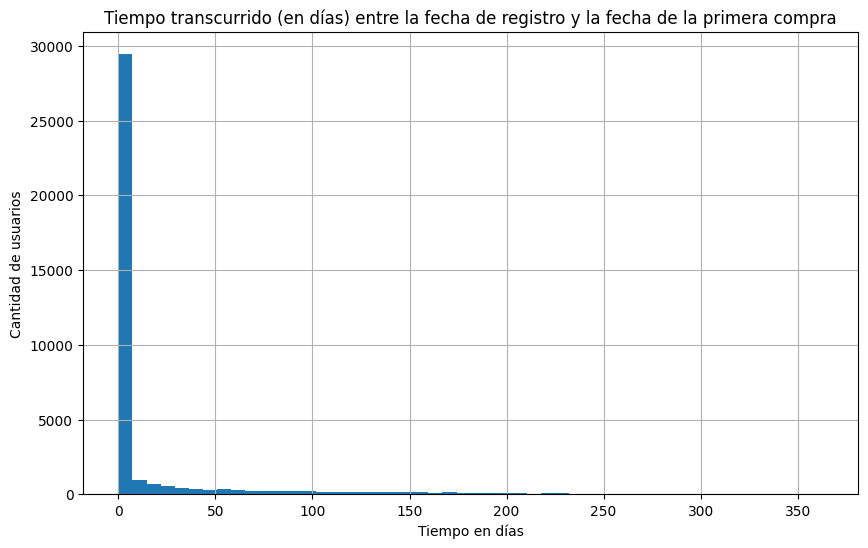

0      26363
1       1011
2        563
3        434
4        324
       ...  
312        1
309        1
341        1
325        1
337        1
Name: delta_time_register_&_first_purchase, Length: 345, dtype: int64

In [36]:
#Análisis y visualización del tiempo transcurrido entre el registro y la primera compra:

display(first_activity['delta_time_register_&_first_purchase'].describe())

plt.figure(figsize=(10,6))
first_activity['delta_time_register_&_first_purchase'].hist(bins=50)
plt.xlabel('Tiempo en días')
plt.ylabel('Cantidad de usuarios')
plt.title('Tiempo transcurrido (en días) entre la fecha de registro y la fecha de la primera compra')
plt.show()


display(first_activity['delta_time_register_&_first_purchase'].value_counts())

In [37]:
#Cálculo del porcentaje de usuarios que compraron el mismo día que se registraron:

first_activity_day_0 = 100 * len(first_activity[first_activity['delta_time_register_&_first_purchase'] == 0]) / len(first_activity['delta_time_register_&_first_purchase'])

print('El porcentaje de usuarios que realizaron la primera compra el mismo día de haberse registrado es de :', round(first_activity_day_0, 2),'%')

El porcentaje de usuarios que realizaron la primera compra el mismo día de haberse registrado es de : 72.18 %


La gran mayoría de usuarios realizaron los primeros pedidos el mismo día que se registraron en la plataforma (es decir, 0 días transcurridos desde la fecha de registro). En total 26363 usuarios hicieron su primera compra el mismo día de su registro. En total fueron 36523 usuarios que se registraron e hicieron al menos una compra. Es decir 72.18 % usuarios realizaron la compra el mismo día del registro.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Excelente! Muy bien con el análisis, efectivamente casi todos los usuarios hacen la primera compra rápidamente.
</div>

### - ¿Cuántos pedidos hacen durante un período de tiempo dado?



In [38]:
#En este caso evaluaremos el periodo de tiempo a estudiar por mes:

df_orders['order_month'] = df_orders['buy_ts'].dt.to_period('M') # ---> Creación de nueva columna que registra las fechas de los pedidos realizados por mes

orders_per_month = df_orders['order_month'].value_counts().sort_index().reset_index() # ---> Cálculo del número de órdenes realizadas por mes

orders_per_month.columns = ['date', 'quantity_orders_per_month']

,date,quantity_orders_per_month
6,2017-12,6218
4,2017-10,5679
5,2017-11,5659
9,2018-03,5326
8,2018-02,5281
7,2018-01,4721
11,2018-05,4346
3,2017-09,3387
10,2018-04,3273
1,2017-07,2363


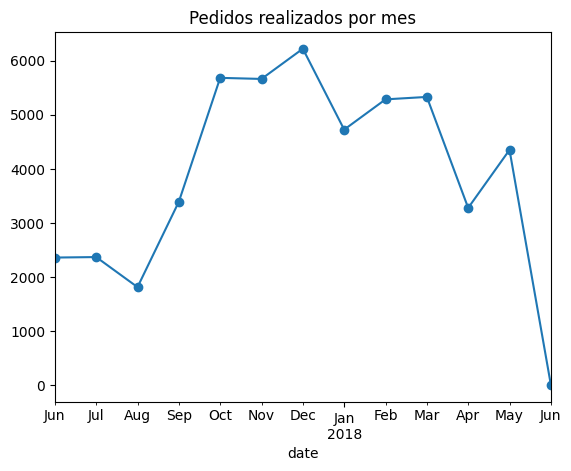

In [39]:
display(orders_per_month.sort_values(by='quantity_orders_per_month', ascending=False))

orders_per_month.plot(kind='line',
                      marker= 'o', 
                      x='date',
                      y='quantity_orders_per_month',
                      title='Pedidos realizados por mes',
                      legend=False)

plt.show()

Al igual que con las visitas: Los meses que se destacan en número de pedidos son Octubre, Noviembre y Diciembre de 2017.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Muy bien, correcto
</div>

### - ¿Cuál es el tamaño promedio de compra?

In [40]:
#El tamaño promedio de compra se calcula fácilmente a través de la columna revenue de df_orders:

average_purchase_revenue = df_orders['revenue'].mean()

print("El tamaño promedio de compra es:", average_purchase_revenue)

El tamaño promedio de compra es: 4.999646930477041


   order_month   revenue
0      2017-06  4.060106
1      2017-07  5.306589
2      2017-08  4.847139
3      2017-09  5.416448
4      2017-10  4.928280
5      2017-11  4.783518
6      2017-12  5.852139
7      2018-01  4.112927
8      2018-02  4.840095
9      2018-03  5.413930
10     2018-04  5.150645
11     2018-05  4.771279
12     2018-06  3.420000


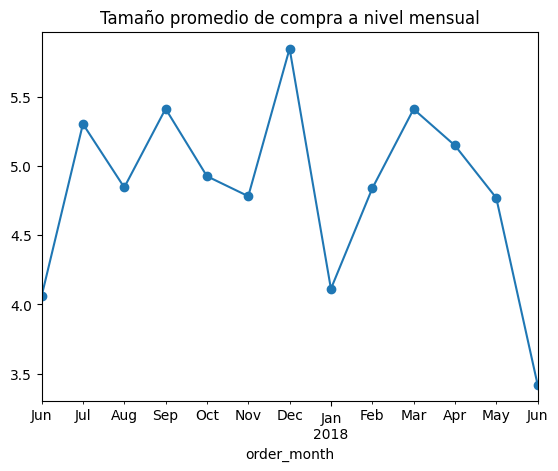

In [41]:
#El dato anterior se podría contrastar con el tamaño promedio de compra a nivel mensual:

average_purchase_per_month = df_orders.groupby('order_month')['revenue'].mean().reset_index()

print(average_purchase_per_month)

average_purchase_per_month.plot(kind='line',
                                marker= 'o', 
                                x='order_month',
                                y='revenue',
                                title='Tamaño promedio de compra a nivel mensual',
                                legend=False)

plt.show()

El tamaño promedio de compra es de 4.99 (unidades de valor monetario). Valor que está dentro del rango de promedio a nivel mensual, que oscila entre 4.0 a 5.8 (valor máximo en diciembre de 2017).

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Muy bien, correcto
</div>

### - ¿Cuánto dinero traen? (LTV)

In [42]:
#Inicialmente del DataFrame df_orders utilizaremos su columna orders_month y de ahí crearemos un nuevo dataframe que agrupe uid a través del valor mínimo del mes:

first_orders = df_orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
display(first_orders.head())

,uid,first_order_month
0,313578113262317,2018-01
1,1575281904278712,2017-06
2,2429014661409475,2017-10
3,2464366381792757,2018-01
4,2551852515556206,2017-11


In [43]:
#Calcularemos el número de nuevos clientes (n_buyers) para cada mes:
#Procederemos a crear y calcular el tamaño de las cohortes:

cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
display(cohort_sizes.head())

,first_order_month,n_buyers
0,2017-06,2023
1,2017-07,1923
2,2017-08,1370
3,2017-09,2581
4,2017-10,4340


In [44]:
#Ahora crearemos un nuevo DataFrame que una df_orders con first_orders con el fin de obtener los meses de compra y la fecha inicial de compra por uid.

df_orders_merged = df_orders.merge(first_orders, on='uid')
df_orders_merged.sample(10)

,buy_ts,revenue,uid,order_month,first_order_month
38963,2018-03-19 14:07:00,4.22,10861651334294503714,2018-03,2018-02
40851,2018-03-06 15:00:00,3.05,10830884595094265695,2018-03,2018-03
34287,2018-01-24 20:35:00,0.12,15536966783612645990,2018-01,2018-01
3756,2018-02-25 20:41:00,7.33,8056418121947262981,2018-02,2017-06
19554,2017-11-01 21:00:00,2.44,5214763830120366251,2017-11,2017-11
15962,2017-10-11 16:51:00,9.78,3248014578526470687,2017-10,2017-10
49819,2018-05-30 14:30:00,0.98,17419359119819417428,2018-05,2018-05
2524,2017-06-08 17:45:00,0.37,13535682222399435774,2017-06,2017-06
20261,2017-11-06 19:53:00,6.11,16224727063823027758,2017-11,2017-11
24941,2017-12-12 09:21:00,1.22,16957373250633165777,2017-12,2017-11


In [45]:
#Aprovechando df_orders_merged agruparemos el mes de la primera compra y el mes de la compra para obtener la sumatoria de revenue y así totalizar los ingresos:

cohorts = df_orders_merged.groupby(['first_order_month', 'order_month']).agg({'revenue':'sum'}).reset_index()
cohorts.head()

,first_order_month,order_month,revenue
0,2017-06,2017-06,9557.49
1,2017-06,2017-07,981.82
2,2017-06,2017-08,885.34
3,2017-06,2017-09,1931.30
4,2017-06,2017-10,2068.58


In [46]:
#Finalmente crearemos un nuevo dataframe que almacene las cohortes y las relacione con la tabla dimensional cohort_sizes:

df_cohort_report = cohorts.merge(cohort_sizes, on='first_order_month')
df_cohort_report

,first_order_month,order_month,revenue,n_buyers
0,2017-06,2017-06,9557.49,2023
1,2017-06,2017-07,981.82,2023
2,2017-06,2017-08,885.34,2023
3,2017-06,2017-09,1931.30,2023
4,2017-06,2017-10,2068.58,2023
...,...,...,...,...
74,2018-03,2018-05,1114.87,3533
75,2018-04,2018-04,10600.69,2276
76,2018-04,2018-05,1209.92,2276
77,2018-05,2018-05,13925.76,2988


Información antes de proceder : El método np.timedelta64(1, 'M') está generando un error del tipo ValueError: Unit M is not supported. Only unambiguous timedelta values durations are supported. Allowed units are 'W', 'D', 'h', 'm', 's', 'ms', 'us', 'ns', [diferentes soluciones en internet](https://365datascience.com/question/error-in-the-code/) sugieren el uso del método de dt.days y dividir entre 30

In [47]:
#Se procede a crear la edad de las cohortes restando order_month con first_order_month:
df_cohort_report['age'] = ((df_cohort_report['order_month'].dt.to_timestamp() - df_cohort_report['first_order_month'].dt.to_timestamp()).dt.days/30).round().astype(int)

df_cohort_report['age'].sample(10)

40    7
59    2
12    0
63    0
16    4
69    1
52    2
0     0
29    6
78    0
Name: age, dtype: int64

In [48]:
#Finalmente creamos una columna adicional que almacene las ganancias por usuario:

df_cohort_report['revenue_per_buyer'] = df_cohort_report['revenue'] / df_cohort_report['n_buyers']

df_cohort_report.sample(10)

,first_order_month,order_month,revenue,n_buyers,age,revenue_per_buyer
0,2017-06,2017-06,9557.49,2023,0,4.724414
78,2018-06,2018-06,3.42,1,0,3.420000
46,2017-10,2018-02,657.77,4340,4,0.151560
66,2018-01,2018-04,481.59,3373,3,0.142778
73,2018-03,2018-04,1063.05,3533,1,0.300892
53,2017-11,2018-02,1326.13,4081,3,0.324952
40,2017-09,2018-04,627.57,2581,7,0.243150
69,2018-02,2018-03,1015.98,3651,1,0.278274
57,2017-12,2017-12,20767.49,4383,0,4.738191
33,2017-09,2017-09,14568.53,2581,0,5.644529


In [49]:
df_cohort_report.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 0 to 78
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype    
---  ------             --------------  -----    
 0   first_order_month  79 non-null     period[M]
 1   order_month        79 non-null     period[M]
 2   revenue            79 non-null     float64  
 3   n_buyers           79 non-null     int64    
 4   age                79 non-null     int64    
 5   revenue_per_buyer  79 non-null     float64  
dtypes: float64(2), int64(2), period[M](2)
memory usage: 4.3 KB


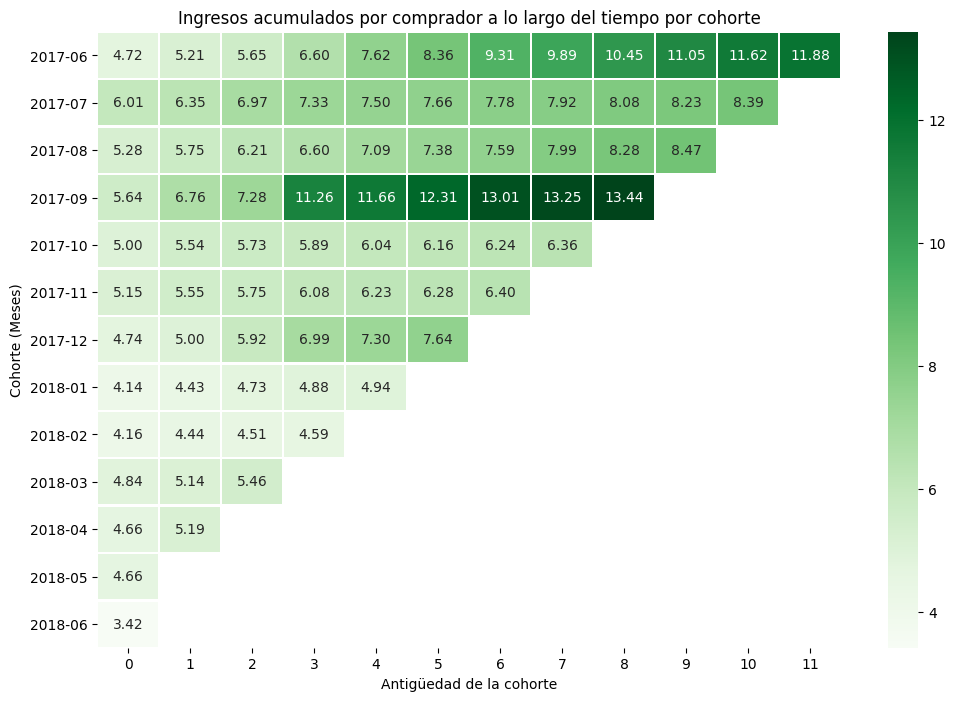

In [50]:
#En este caso crearemos una tabla dinámica que muestre los ingresos acumulados a lo largo de tiempo para cada cohorte:

cohort_pivot = df_cohort_report.pivot_table(index='first_order_month', columns='age', values='revenue_per_buyer', aggfunc='mean').cumsum(axis=1).round(2)



plt.figure(figsize=(12,8))
sns.heatmap(cohort_pivot, annot=True, linewidths=1, cmap='Greens' , fmt=".2f")
plt.title('Ingresos acumulados por comprador a lo largo del tiempo por cohorte')
plt.xlabel('Antigüedad de la cohorte')
plt.ylabel('Cohorte (Meses)')
plt.show()

Del gráfico anterior podemos destacar que la cohorte '2017-09' da un salto de ingresos por usuario importante a partir del tercer mes de antiguedad (diciembre de 2017), siendo así la cohorte que más aportó ingresos por usuarios.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Excelente! Muy bien con el cálculo del LTV, correcto!
</div>

## Marketing:

### - ¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)

In [51]:
#Inicialmente calcularemos el gasto de dinero total:

df_costs_total = df_costs['costs'].sum()

print("El dinero total gastado fue de:", df_costs_total)

El dinero total gastado fue de: 329131.62


,month,costs
0,2017-06,18015.00
1,2017-07,18240.59
2,2017-08,14790.54
3,2017-09,24368.91
4,2017-10,36322.88
5,2017-11,37907.88
6,2017-12,38315.35
7,2018-01,33518.52
8,2018-02,32723.03
9,2018-03,30415.27


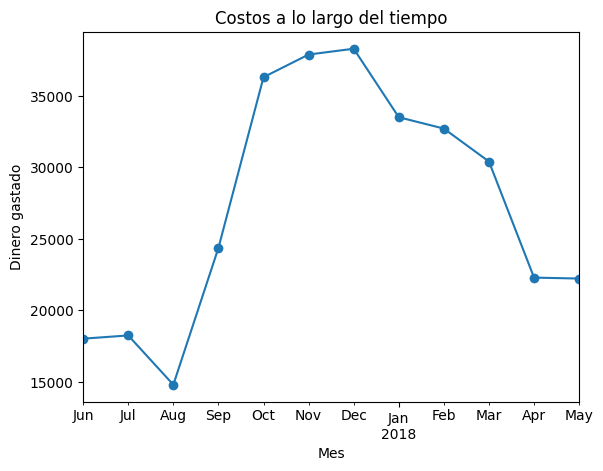

In [52]:
#Ahora calcularemos el dinero gastado por mes, para ello inicialmente crearemos una columna de mes:

df_costs['month'] = df_costs['dt'].dt.to_period('M')
costs_per_month = df_costs.groupby('month').agg({'costs':'sum'}).reset_index()

display(costs_per_month)

costs_per_month.plot(kind='line', marker='o', x='month', y='costs', legend=False, title='Costos a lo largo del tiempo')
plt.xlabel('Mes')
plt.ylabel('Dinero gastado')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto!
</div>

,source_id,costs
0,3,141321.63
1,4,61073.60
2,5,51757.10
3,2,42806.04
4,1,20833.27
5,10,5822.49
6,9,5517.49


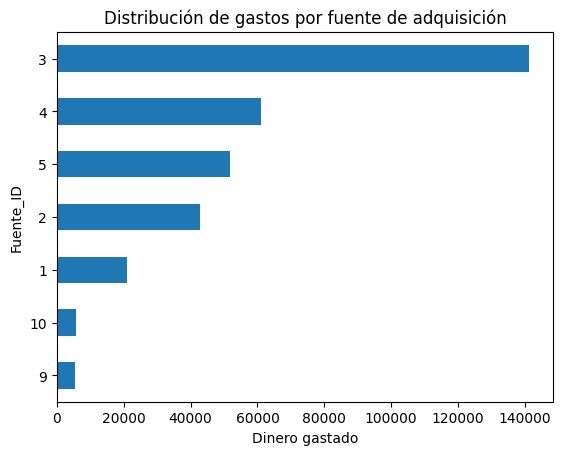

In [53]:
#Finalmente crearemos un nuevo dataframe que almacene y muestre los costos por las diferentes fuentes de gastos:

costs_per_source = df_costs.groupby('source_id')['costs'].sum().sort_values(ascending=False)

costs_per_source_table = costs_per_source.reset_index()
display(costs_per_source_table)

costs_per_source.sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Dinero gastado')
plt.ylabel('Fuente_ID')
plt.title('Distribución de gastos por fuente de adquisición')

plt.show()

In [54]:
top1_source_id_costs_generator = (costs_per_source.iloc[0] / df_costs_total) * 100

print('La fuente que más gastos generó fue: \n source_id', costs_per_source_table['source_id'].iloc[0], '\n Representando un \n', top1_source_id_costs_generator, '% de los gastos totales')

La fuente que más gastos generó fue: 
 source_id 3 
 Representando un 
 42.9377250353521 % de los gastos totales


Podemos observar como al igual que los ingresos y el número de órdenes generadas, los meses con mayor número de gastos generados fueron octubre, noviembre y diciembre de 2017. Por otro lado, la Fuente de Adquisición número 3 fue la que más generó gastos con 141321.63 representando un 42.94 % de los gastos totales.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto!
</div>

### - ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

In [55]:
#Inicialmente crearemos el número de usuarios únicos que se registraron y realizaron una compra en un nuevo DataFrame

df_visits['date'] = df_visits['start_ts'].dt.date #---> Se crea una nueva columna en df_visits que almacene las fechas
df_visits['date'] = pd.to_datetime(df_visits['date'])

first_visit = df_visits.sort_values(by='start_ts').groupby('uid').first().reset_index() # ---> Se genera un nuevo Dataframe que agrupe los usuarios por la fecha que abrieron su primera sesión

registered_buyers = first_visit[first_visit['uid'].isin(df_orders['uid'].unique())] # ---> Se genera un nuevo Dataframe que almacene a aquellos usuarios que se registraron y a su vez generaron una compra

clients_per_source = registered_buyers.groupby(['source_id','date'])['uid'].nunique().reset_index() # ---> Se crea un nuevo Dataframe que agrupe por fecha y fuente al número único de usuarios

clients_per_source = clients_per_source.rename(columns={'uid':'number_of_unique_users'})

clients_per_source

,source_id,date,number_of_unique_users
0,1,2017-06-01,24
1,1,2017-06-02,12
2,1,2017-06-03,8
3,1,2017-06-04,6
4,1,2017-06-05,20
...,...,...,...
2395,10,2018-05-27,2
2396,10,2018-05-28,7
2397,10,2018-05-29,4
2398,10,2018-05-30,10


In [56]:
#De la misma forma, se genera lo mismo para los costos por fuente:

costs_per_source_date = df_costs.groupby(['source_id', 'dt'])['costs'].sum().reset_index()

costs_per_source_date

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [57]:
#Ahora los uniremos a través de merge:

merged_source_costs = costs_per_source_date.merge(clients_per_source, left_on=['source_id', 'dt'], right_on=['source_id','date'])

merged_source_costs['CAC'] = merged_source_costs['costs'] / merged_source_costs['number_of_unique_users']

print(merged_source_costs[['date','source_id', 'CAC']])

           date  source_id       CAC
0    2017-06-01          1  3.133333
1    2017-06-02          1  5.187500
2    2017-06-03          1  4.566250
3    2017-06-04          1  9.166667
4    2017-06-05          1  2.854000
...         ...        ...       ...
2394 2018-05-27         10  4.960000
2395 2018-05-28         10  3.037143
2396 2018-05-29         10  2.830000
2397 2018-05-30         10  3.315000
2398 2018-05-31         10  0.704000

[2399 rows x 3 columns]


In [58]:
print('El costo promedio de adquisición por clientes se distribuye así: ') 
print(merged_source_costs.groupby('source_id')['CAC'].mean().sort_values(ascending=False))

El costo promedio de adquisición por clientes se distribuye así: 
source_id
2     17.002963
3     15.118899
1      9.118983
5      8.596789
9      7.152904
4      6.802483
10     6.553861
Name: CAC, dtype: float64


Las fuentes 2 y 3 son las que en más costos por número de usuarios generaron en promedio.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Muy buen trabajo! Este cálculo del cac (mediante cac diario) es el más preciso, muy bien!
</div>

### - ¿Cuán rentables eran las inversiones? (ROMI)

Para este caso el ROMI se debe calcular por fuente, ya que los costos de marketing son diferentes para cada fuente. 
Para cada fuente, con solo sus usuarios que entraron a través de dicha fuente se debe proceder a calcular el LTV  y el CAC.

Luego ROMI = LTV / CAC

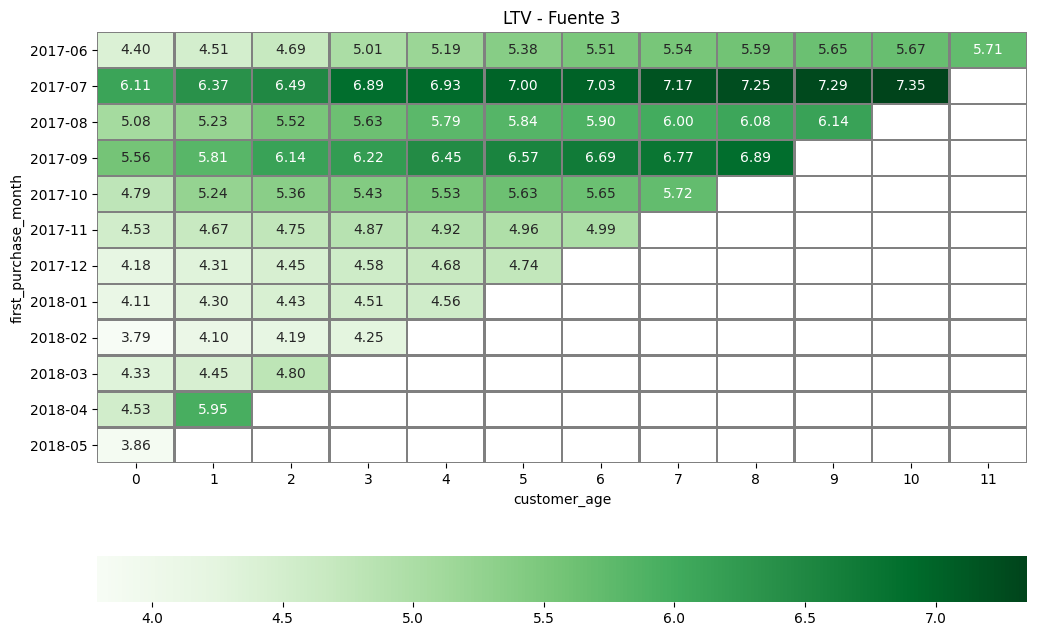

ROMI para la fuente 3: 0.005863789196192871


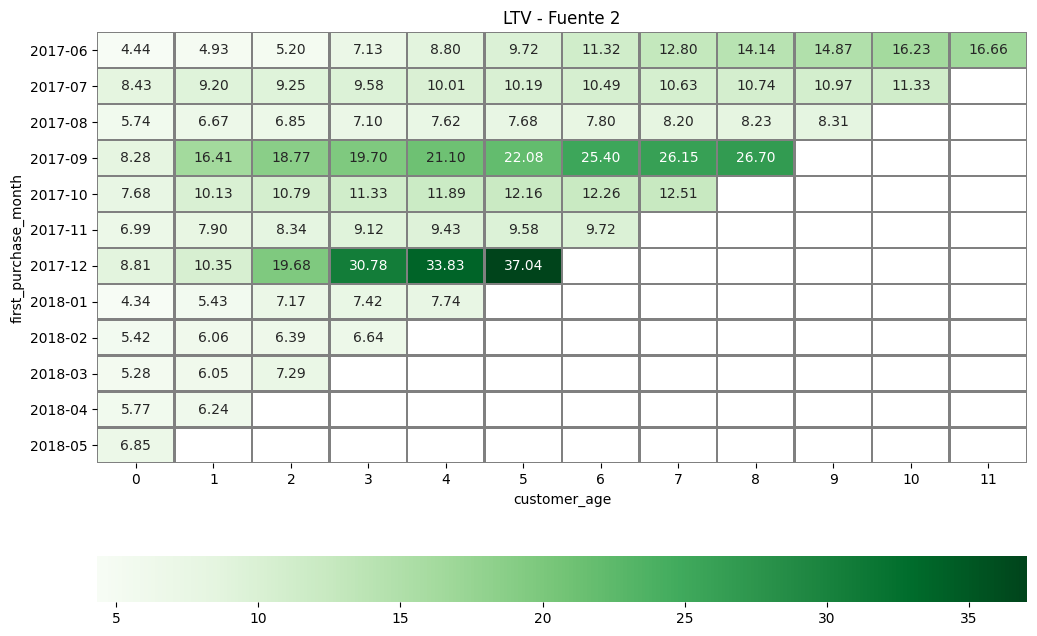

ROMI para la fuente 2: 0.0484191542567325


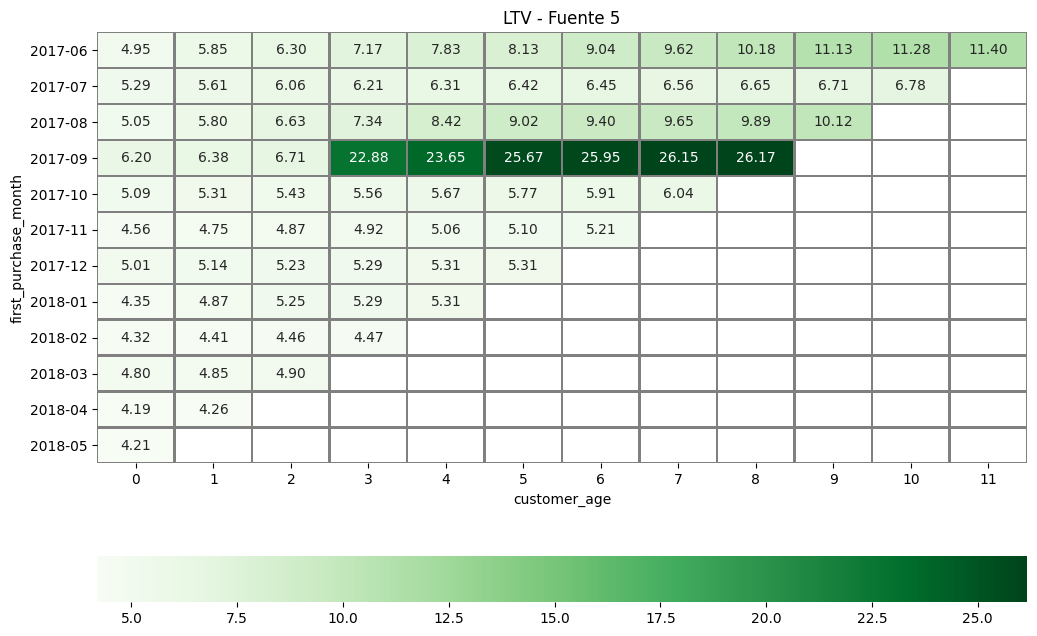

ROMI para la fuente 5: 0.05258058322152805


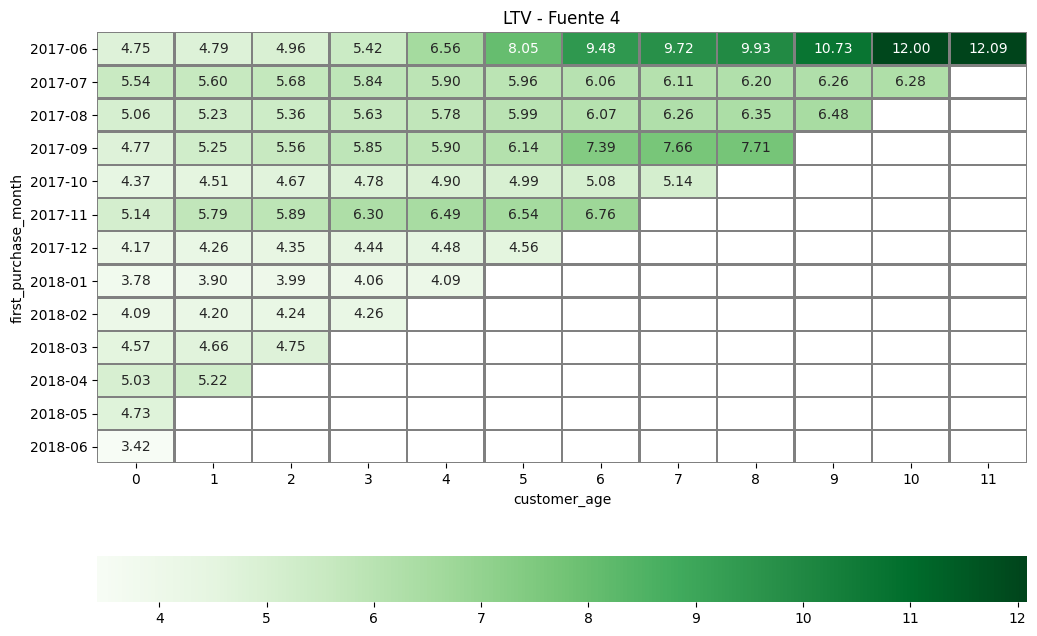

ROMI para la fuente 4: 0.04658931421770073


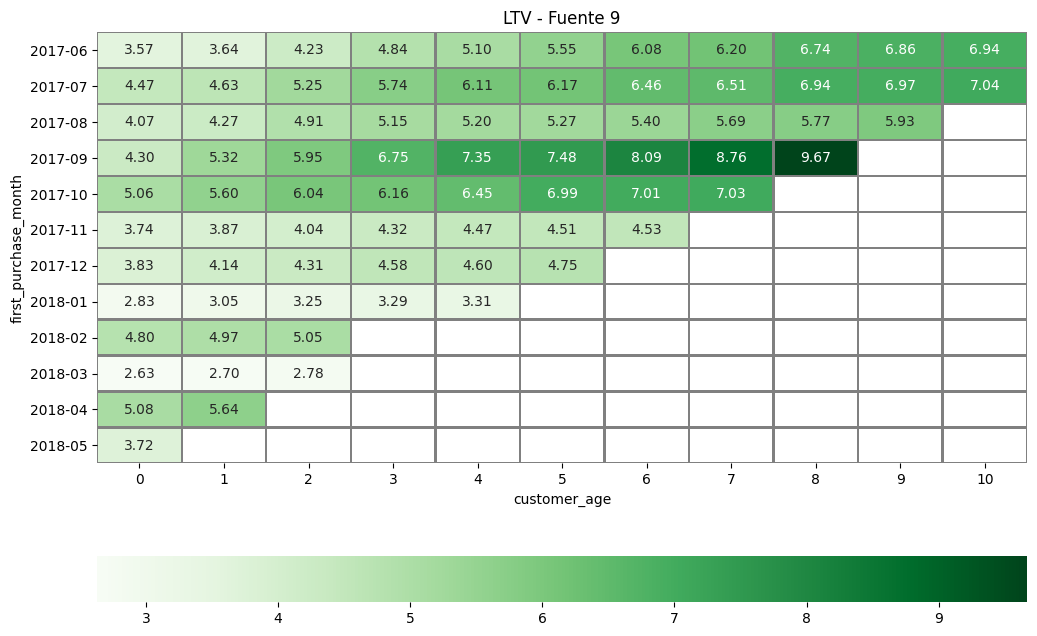

ROMI para la fuente 9: 0.02835466325935587


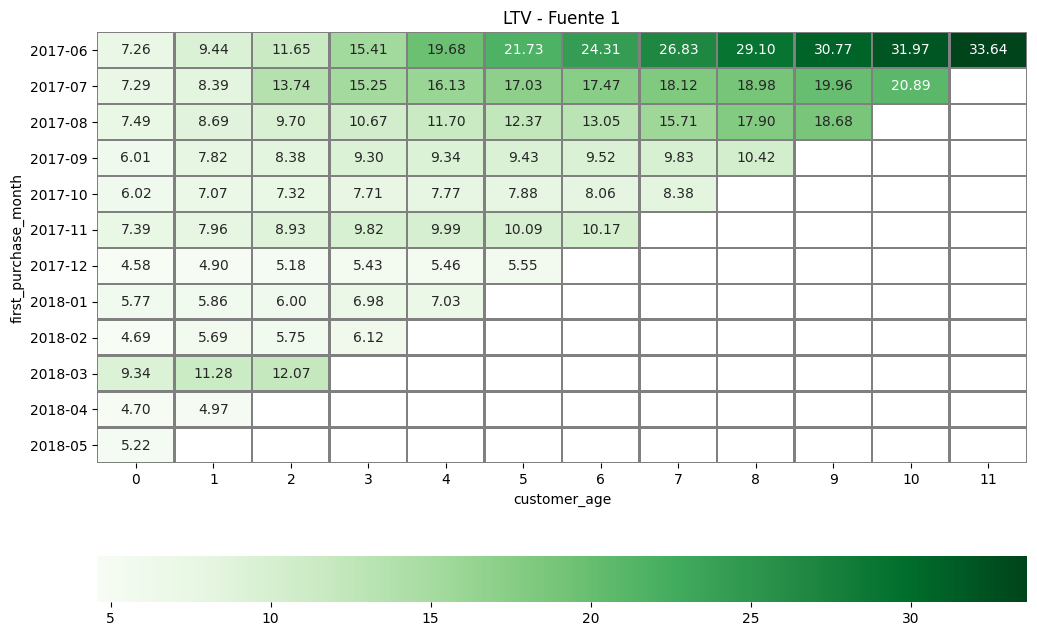

ROMI para la fuente 1: 0.06298504696228287


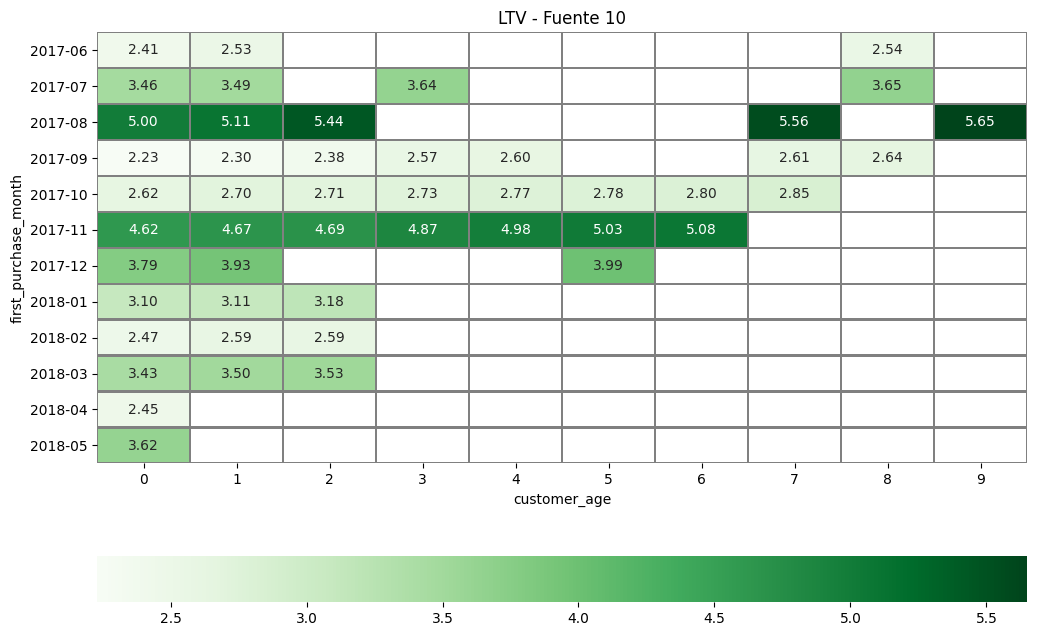

ROMI para la fuente 10: 0.005949555142930363
No hay datos suficientes para generar el heatmap para la fuente de adquisición 6


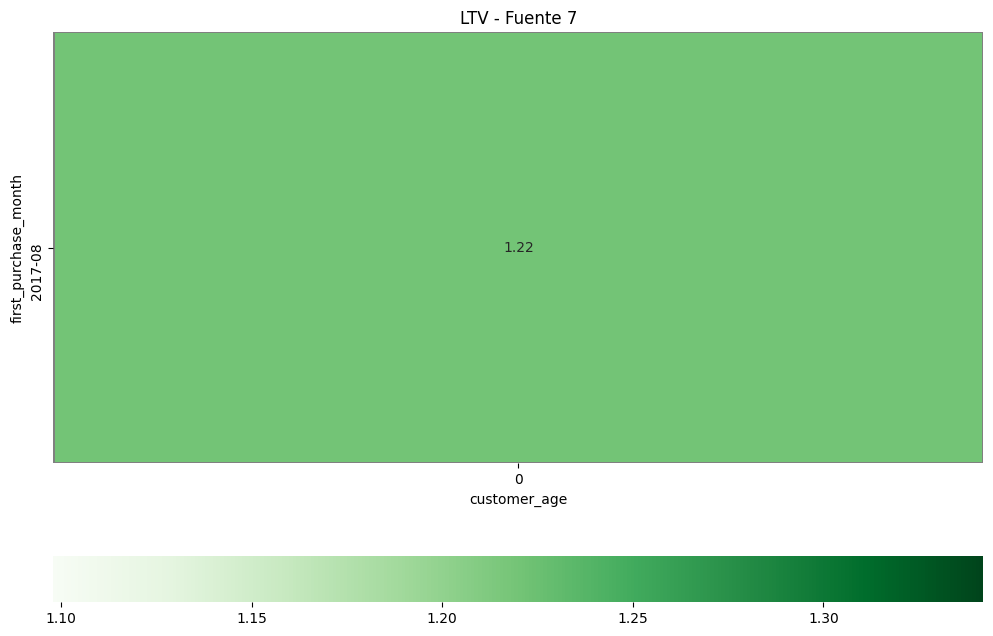

No se pudo calcular el ROMI para la fuente 7 debido a CAC nulo o cero.

 ROMI para cada fuente:


,source_id,ROMI
0,3,0.005864
1,2,0.048419
2,5,0.052581
3,4,0.046589
4,9,0.028355
5,1,0.062985
6,10,0.005950


In [59]:
#Inicialmente crearemos una lista vacía a la que llamaremos romi_list_results:

romi_list_results = []

#Ahora se debe proceder a crear un loop que almacene las fuentes 

for source_id in first_visit['source_id'].unique():
    source_users = first_visit[first_visit['source_id'] == source_id]['uid']    #---> En source_users almacenaremos el uid del usuario para las fuentes únicas en su primera visita.
    
    source_orders = df_orders[df_orders['uid'].isin(source_users)]              #---> Ahora asignamos a source_users con los datos coincidentes en su primera compra en source_orders.
    
    if source_orders.empty:
        print(f"No hay datos suficientes para generar el heatmap para la fuente de adquisición {source_id}")
        continue
    
    # Primer mes compra
    first_purchase_month = source_orders.groupby('uid')['buy_ts'].min().dt.to_period('M').reset_index() #---> Creación DF que almacena el uid por el mes que se realizó la primera compra
    first_purchase_month.columns = ['uid', 'first_purchase_month']
    
    # Union de los datos calculados
    merged_orders = source_orders.merge(first_purchase_month, on='uid', how='left')
    

    #Cálculo de la edad por cliente a través de la diferencia de la compra actual menos la fecha de la primera compra (en meses)
    merged_orders['customer_age'] = merged_orders.apply(lambda row: (row['buy_ts'].to_period('M') - row['first_purchase_month']).n, axis=1)
    
    
    #Cálculo del tamaño de la cohorte
    cohort_calculation_table = merged_orders.groupby('first_purchase_month')['uid'].nunique().reset_index()
    cohort_calculation_table.columns = ['first_purchase_month', 'cohort_size']
    
    
    # Calcular el LTV
    ltv_table = merged_orders.groupby(['first_purchase_month', 'customer_age'])['revenue'].sum().reset_index()
    ltv_merged_table = ltv_table.merge(cohort_calculation_table, on='first_purchase_month', how='left')
    
    ltv_merged_table['LTV'] = ltv_merged_table['revenue'] / ltv_merged_table['cohort_size'] #---> Agregación de columna que calcula el LTV
    
    
    # Filtrar para obtener solo el LTV con al menos 5 meses de edad (tiempo para que el LTV se estabilice y sea representativo)
    ltv_5_months = ltv_merged_table[ltv_merged_table['customer_age'] == 5]['LTV']

    # Calcular el LTV promedio de los clientes con 5 meses de edad
    average_ltv = ltv_5_months.mean()

    # Crear una tabla pivot para visualizar el LTV
    ltv_table_pivot = ltv_merged_table.pivot_table(
        index='first_purchase_month',
        columns='customer_age',
        values='LTV',
        aggfunc='sum').cumsum(axis=1)
    
    # Verificar si ltv_table_pivot tiene datos antes de intentar graficar
    if not ltv_table_pivot.empty:
        # Visualizar el LTV acumulado usando un heatmap
        ltv_table_pivot.index = ltv_table_pivot.index.astype(str)
        plt.figure(figsize=(12, 8))
        sns.heatmap(ltv_table_pivot.round(2), annot=True, fmt='.2f', linewidths=1, cmap='Greens', linecolor='grey', cbar_kws={'orientation': 'horizontal'}).set(title=f'LTV - Fuente {source_id}')
        plt.show()
    else:
        print(f"No hay datos suficientes para generar el heatmap para la fuente {source_id}")
    
    # Calcular el CAC para la fuente
    CAC = merged_source_costs[merged_source_costs['source_id'] == source_id]['CAC'].mean()
    
    # Calcular el ROMI
    if CAC and CAC > 0:  # Asegurarse de que CAC no sea cero o nulo
        ROMI = average_ltv / CAC
        romi_list_results.append({'source_id': source_id, 'ROMI': ROMI})
        print(f"ROMI para la fuente {source_id}: {ROMI}")
    else:
        print(f"No se pudo calcular el ROMI para la fuente {source_id} debido a CAC nulo o cero.")

# Crear un DataFrame con los resultados de ROMI
romi_df = pd.DataFrame(romi_list_results)

print("\n ROMI para cada fuente:")
display(romi_df) 
    
    
    
    
    
    
    
    

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Excelente! Muy bien hecho, el cálculo está bastante bien pero con un detalle. El ltv se debe usar acumulado a medida que pasa la edad de la cohorte. Con esto en mente, hay que corregir el cálculo de average_ltv para que tome la tabla pivot donde ya está acumulado el revenue. Esto queda así (removí la parte que muestra los ltv):
</div>

In [74]:
#Inicialmente crearemos una lista vacía a la que llamaremos romi_list_results:

romi_list_results = []

#Ahora se debe proceder a crear un loop que almacene las fuentes 

for source_id in first_visit['source_id'].unique():
    source_users = first_visit[first_visit['source_id'] == source_id]['uid']    #---> En source_users almacenaremos el uid del usuario para las fuentes únicas en su primera visita.
    
    source_orders = df_orders[df_orders['uid'].isin(source_users)]              #---> Ahora asignamos a source_users con los datos coincidentes en su primera compra en source_orders.
    
    if source_orders.empty:
        print(f"No hay datos suficientes para generar el heatmap para la fuente de adquisición {source_id}")
        continue
    
    # Primer mes compra
    first_purchase_month = source_orders.groupby('uid')['buy_ts'].min().dt.to_period('M').reset_index() #---> Creación DF que almacena el uid por el mes que se realizó la primera compra
    first_purchase_month.columns = ['uid', 'first_purchase_month']
    
    # Union de los datos calculados
    merged_orders = source_orders.merge(first_purchase_month, on='uid', how='left')
    

    #Cálculo de la edad por cliente a través de la diferencia de la compra actual menos la fecha de la primera compra (en meses)
    merged_orders['customer_age'] = merged_orders.apply(lambda row: (row['buy_ts'].to_period('M') - row['first_purchase_month']).n, axis=1)
    
    
    #Cálculo del tamaño de la cohorte
    cohort_calculation_table = merged_orders.groupby('first_purchase_month')['uid'].nunique().reset_index()
    cohort_calculation_table.columns = ['first_purchase_month', 'cohort_size']
    
    
    # Calcular el LTV
    ltv_table = merged_orders.groupby(['first_purchase_month', 'customer_age'])['revenue'].sum().reset_index()
    ltv_merged_table = ltv_table.merge(cohort_calculation_table, on='first_purchase_month', how='left')
    
    ltv_merged_table['LTV'] = ltv_merged_table['revenue'] / ltv_merged_table['cohort_size'] #---> Agregación de columna que calcula el LTV
    
    
    # Filtrar para obtener solo el LTV con al menos 5 meses de edad (tiempo para que el LTV se estabilice y sea representativo)
    ltv_5_months = ltv_merged_table[ltv_merged_table['customer_age'] == 5]['LTV']

    # Calcular el LTV promedio de los clientes con 5 meses de edad
    average_ltv = ltv_5_months.mean()

    # Crear una tabla pivot para visualizar el LTV
    ltv_table_pivot = ltv_merged_table.pivot_table(
        index='first_purchase_month',
        columns='customer_age',
        values='LTV',
        aggfunc='sum').cumsum(axis=1)
    
    try:
        average_ltv = ltv_table_pivot[5].mean()
    except:
        pass

    
    # Calcular el CAC para la fuente
    CAC = merged_source_costs[merged_source_costs['source_id'] == source_id]['CAC'].mean()

    
    # Calcular el ROMI
    if CAC and CAC > 0:  # Asegurarse de que CAC no sea cero o nulo
        ROMI = average_ltv / CAC
        romi_list_results.append({'source_id': source_id, 'ROMI': ROMI})
        print(f"ROMI para la fuente {source_id}: {ROMI}")
    else:
        print(f"No se pudo calcular el ROMI para la fuente {source_id} debido a CAC nulo o cero.")

# Crear un DataFrame con los resultados de ROMI
romi_df = pd.DataFrame(romi_list_results)

print("\n ROMI para cada fuente:")
display(romi_df) 
    

ROMI para la fuente 3: 0.37900570443468423
ROMI para la fuente 2: 0.9111091265247679
ROMI para la fuente 5: 1.087086019309011
ROMI para la fuente 4: 0.8867907589421287
ROMI para la fuente 9: 0.812963628307723
ROMI para la fuente 1: 1.3172068994018844
ROMI para la fuente 10: 0.599697537876555
No hay datos suficientes para generar el heatmap para la fuente de adquisición 6
No se pudo calcular el ROMI para la fuente 7 debido a CAC nulo o cero.

 ROMI para cada fuente:


,source_id,ROMI
0,3,0.379006
1,2,0.911109
2,5,1.087086
3,4,0.886791
4,9,0.812964
5,1,1.317207
6,10,0.599698


# Paso 3. Conclusiones

- La cohorte que mejor desempeño tuvo en las fuentes de adquisición 2 y 9 es la de '2017-09'. Y también tuvo un gran desempeño en la fuente 5.
- La primera cohorte '2017-06' obtuvo un gran desempeño en las fuentes 1 y 4.
- La cohorte que tuvo más rápido crecimiento fue la '2017-12' a través de la fuente 2. Y no sólo fue la de más rápido crecimiento, sino la que más ganancias generó a través de sus clientes.


Definitivamente la **fuente 3** es la que peores resultados obtuvo: Fue la que más gastos generó (42.94 % de los gastos totales) y fue de las que menor rendimiento (LTV) tuvo: Ninguna cohorte superó los 10 puntos de ingresos por tamaño de cohorte. Además que en promedio es el segundo que más gastos genera para poder adquirir clientes.

Se destaca el comportamiento de **la fuente 1** que en comparativa con el resto, no es de la que más gastos genera (6.33 % de los gastos totales) y obtuvo muy buenos ingresos en sus primeras cohortes, con un crecimiento sostenido a través del tiempo.

La cohorte '2017-09' obtuvo un gran desempeño en al menos 3 fuentes y fue la que mayores ingresos generó. Sin duda alguna, es el grupo modelo a seguir y estudiar para obtener mejores rendimientos en ingresos vs costos.

Finalmente habría que revisar el momento clave (entre febrero y marzo de 2018) que definió el salto significativo que se dió en la cohorte '2017-12' a través de la fuente 2. 

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Muy bien! Excelentes conclusiones de acuerdo los resultados obtenidos.
</div>